Accuracy: 96.67%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



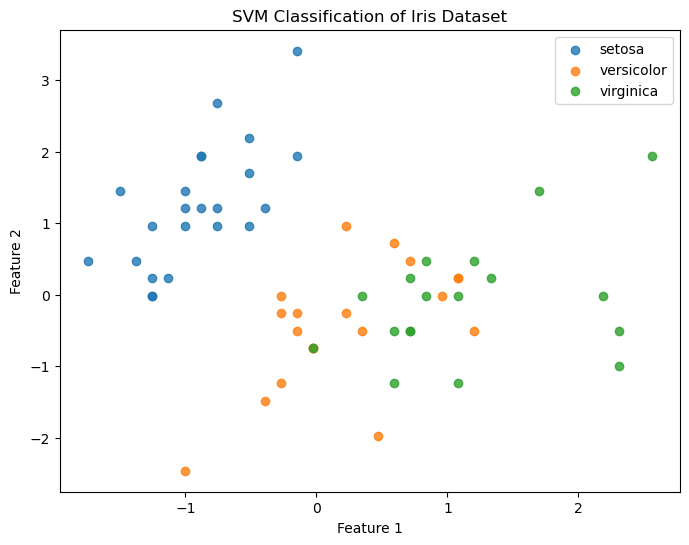

Data Table:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            0.345565         -0.502716           0.503556         -0.058102   
1           -0.146148          1.942928          -1.262161         -1.264843   
2            2.312416         -0.991844           1.798415          1.416803   
3            0.222637         -0.258151           0.385842          0.344145   
4            1.206062         -0.502716           0.562414          0.210062   
5           -0.514933          0.964670          -1.379875         -1.130761   
6           -0.269076         -0.258151          -0.143873          0.075980   
7            1.328991          0.230977           0.738985          1.416803   
8            0.468493         -1.970101           0.385842          0.344145   
9           -0.023220         -0.747280           0.032698         -0.058102   
10           0.837278          0.475542           0.738985          1.014556   
11          -1.252502      

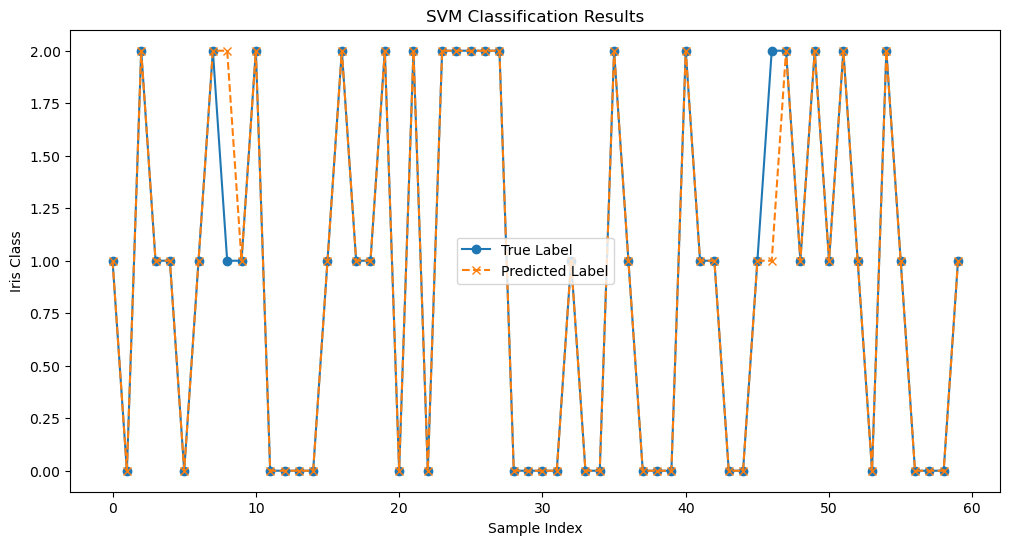

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集划分为训练集和测试集（60%训练集，40%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 对数据进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用SVM分类器
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确度、精确度、召回率和F1分数
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 绘制分类结果图
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], alpha=.8, label=target_name)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification of Iris Dataset')
plt.legend(loc='best')
plt.show()

# 绘制数据表
df = pd.DataFrame(X_test, columns=iris.feature_names)
df['True Label'] = iris.target_names[y_test]
df['Predicted Label'] = iris.target_names[y_pred]
print("Data Table:\n", df)

# 绘制曲线图
x = np.arange(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x, y_test, label='True Label', marker='o')
plt.plot(x, y_pred, label='Predicted Label', marker='x', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Iris Class')
plt.title('SVM Classification Results')
plt.legend(loc='best')
plt.show()
